# Survey Data Analysis
## Star Wars Films

 The team at [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) became interested in answering some questions about Star Wars fans. In particular, they wondered: Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed `Star Wars` fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb).

The data has several columns, including the following:

- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

These are the questions I endeavor to investigate in this project:

-  Among the six Star Wars movies released between 1977 and 2003; which is the most favorite and what is the order of movie preference from first to sixth among the viewers surveyed?

-  Is there a relationship between movie preference and the number of people who watched the movies?

- Do male and female viewers agree on the order of movie preference from first to sixth? 

-  Is there any difference in movie preference among Age groups and Education level?

- There are fourteen characters identified in the survey who were portrayed in some or all of the movies identified. Who were the top 5 most liked and the bottom 5 most disliked?

In [1]:
# Read the data into a pandas DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
print(star_wars.columns)
print(f"No of Rows:{len(star_wars)}")

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Convert Colums to Boolean

Some columns are currently string types, because the main values they contain are` Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`,` False`, and `NaN`. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.



In [2]:
#Convert to Boolean
boolean = {"Yes": True, "No": False}
col = [ "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]
for c in col:
    star_wars[c] = star_wars[c].map(boolean)
star_wars.head()

# drop the survey responders who did not see any star wars movies
star_wars = star_wars[star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] == True]
print(len(star_wars))

936


We have reduced the dataset by 250 rows as these people did not see any of the 6 films in the Star Wars Franchise.

### Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to a question. The columns in question are:

- `Which of the following Star Wars films have you seen? Please select all that apply`. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

If the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [3]:
# Convert each of these columns to a Boolean
movie_checkbox = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False,
}

for colum in star_wars.columns[3:9]:
    star_wars[colum] = star_wars[colum].map(movie_checkbox)
star_wars.head()

# Rename the columns names
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "episode_1",
        "Unnamed: 4": "episode_2",
        "Unnamed: 5": "episode_3",
        "Unnamed: 6": "episode_4",
        "Unnamed: 7": "episode_5",
        "Unnamed: 8": "episode_6"
        })

#star_wars.head()

### Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN

In [4]:
# Convert each of column 9:15 to a float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float).copy()
star_wars[star_wars.columns[9:15]].copy()
# Rename the columns names
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


## No. of People who Watched Each Star Wars Film

episode_3    550
episode_2    571
episode_4    607
episode_1    673
episode_6    738
episode_5    758
dtype: int64


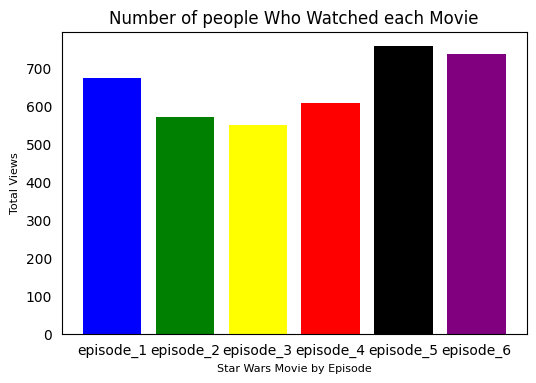

In [5]:
#How many people have seen each movie
seen_movie = star_wars[star_wars.columns[3:9]].sum()
plt.bar(star_wars.columns[3:9], seen_movie, color=["blue", "green", "yellow", "red", "black","purple"])
plt.title("Number of people Who Watched each Movie")
plt.xlabel("Star Wars Movie by Episode", fontsize=8)
plt.ylabel("Total Views", fontsize=8)
plt.tick_params(bottom=False, left=False)
print(seen_movie.sort_values())

## Ranking Movies

We can now find the highest-ranked movie quicker.

ranking_5    2.513158
ranking_6    3.047847
ranking_4    3.272727
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
dtype: float64


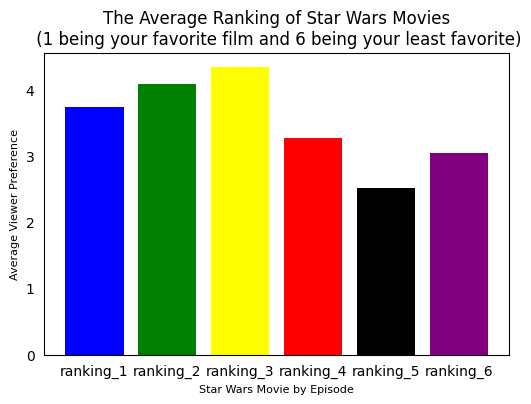

In [6]:
# Compute the Mean of the Movie Ranks
average_rank= star_wars[star_wars.columns[9:15]].mean()
 
# Plot a bar chart of the movie ranks
plt.bar(star_wars.columns[9:15], average_rank, color=["blue", "green", "yellow", "red", "black","purple"])
plt.title("The Average Ranking of Star Wars Movies\n (1 being your favorite film and 6 being your least favorite)")
plt.xlabel("Star Wars Movie by Episode", fontsize=8)
plt.ylabel("Average Viewer Preference", fontsize=8)
plt.tick_params(bottom=False, left=False)
print(average_rank.sort_values())
plt.show()


The movie `Star Wars: Episode V The Empire Strikes Back`, `ranking_5`  has the lowest average mean making it the most favorite film. The least favorite being `Star Wars: Episode III Revenge of the Sith` , `ranking_3`. 

The directors, screen writers and producers were all different for the latest 3 movies compared to the 3 earlier films from research on [ Wikipedia](https://en.wikipedia.org/wiki/List_of_Star_Wars_films "here").

The first three movies released may have had a lot more emphasis placed on character development than the latest three. The time span between the last of the top3 and the first of the bottom 3 is sixteen years. Could age of the viewers come into play here as a reason for the first three movies that were released being the top 3 choices?  Considering the sixteen year gap between the first group of 3 movies and the second three, different actors needed to be involved. There may have been a significant difference in acting quality between the two groups of movies. 

Comparing the two graphs, as the preference to watch a specific movie declines the volume of viewers declines.

Many people may depend upon ratings published by critics on "Rotten Tomatoes" or other movie critics to base their decision on whether to watch a movie or not. On Rotten Tomatoes, the rating for `Revenge of the Sith`_ was 79% and for _`Return of the Jedi` at 83%. It's interesting that the Audience Score even had a much bigger difference between the two: `Revenge of the Sith` 66% and `Return of the Jedi` 94% .

##  Exploring the Data among Star Wars Film Fans

The Avarage Rank of Star Wars Movies among Fans:
ranking_5    2.333333
ranking_6    2.829710
ranking_4    2.932971
ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
dtype: float64


The Avarage Rank of Star Wars Movies among Non-Fans:
ranking_5    2.862676
ranking_1    2.936396
ranking_6    3.471831
ranking_2    3.591549
ranking_4    3.933099
ranking_3    4.193662
dtype: float64


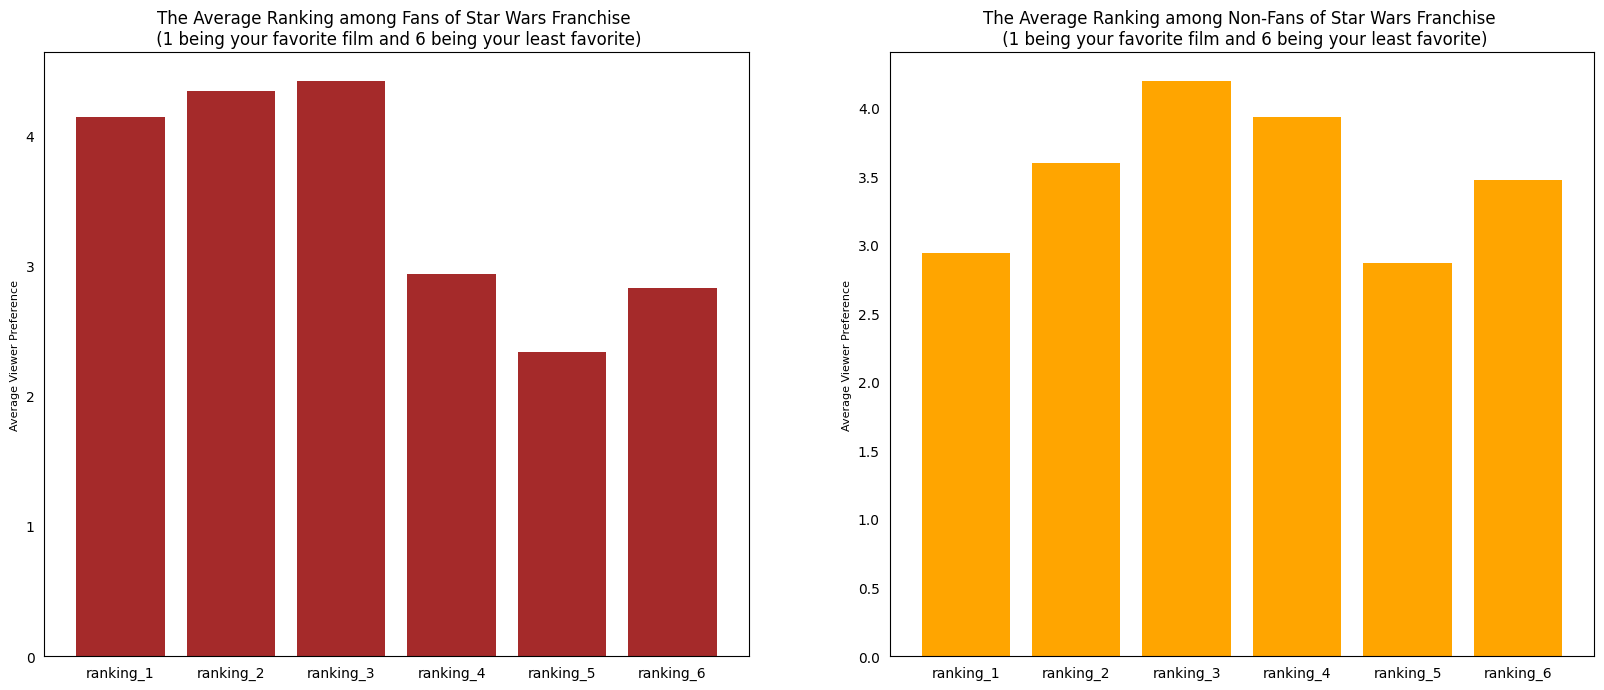

In [7]:
#Split the Dataframe into two groups
is_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True ]
not_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False ]

# Compute the Mean of the Movie Ranks
average_rank_fan=is_fan[is_fan.columns[9:15]].mean()
average_rank_not_fan=not_fan[not_fan.columns[9:15]].mean()

print(f"The Avarage Rank of Star Wars Movies among Fans:\n{average_rank_fan.sort_values()}")
print("\n")
print(f"The Avarage Rank of Star Wars Movies among Non-Fans:\n{average_rank_not_fan.sort_values()}")

# Plot a bar chart of the movie ranks among fans
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.bar(star_wars.columns[9:15], average_rank_fan, color="brown")
plt.ylabel("Average Viewer Preference", fontsize=8)
plt.tick_params(bottom=False, left=False)
plt.title("The Average Ranking among Fans of Star Wars Franchise \n (1 being your favorite film and 6 being your least favorite)")

# Plot a bar chart of the movie ranks among non fans
plt.subplot(1, 2, 2)
plt.bar(star_wars.columns[9:15], average_rank_not_fan, color="orange")
plt.ylabel("Average Viewer Preference", fontsize=8)
plt.tick_params(bottom=False, left=False)
plt.title("The Average Ranking among Non-Fans of Star Wars Franchise \n (1 being your favorite film and 6 being your least favorite)")
plt.show()


The movie `Star Wars: Episode V The Empire Strikes Back`, `ranking_5` still has the lowest average mean ranking making it the most favorite film. The least favorite being` Star Wars: Episode III Revenge of the Sith` , `ranking_3`.

The latest episodes seem to be the most favourite compaired to the earlier episodes among Star Wars Transhise Fans. It's interesting that `Star Wars: Episode I The Phantom Menace`, `ranking_1` is a favorite among Non Fans of Star Wars Franchise.

## Exploring the Data among Star Wars Film Fans

The Average Rank among Fans of Star Trek Franchise:
ranking_5    2.407229
ranking_6    2.850602
ranking_4    3.110843
ranking_1    3.968675
ranking_2    4.255422
ranking_3    4.403382
dtype: float64


The Average Rank among Non-Fans of Star Trek Franchise:
ranking_5    2.634383
ranking_6    3.244552
ranking_4    3.433414
ranking_1    3.487864
ranking_2    3.915254
ranking_3    4.278450
dtype: float64


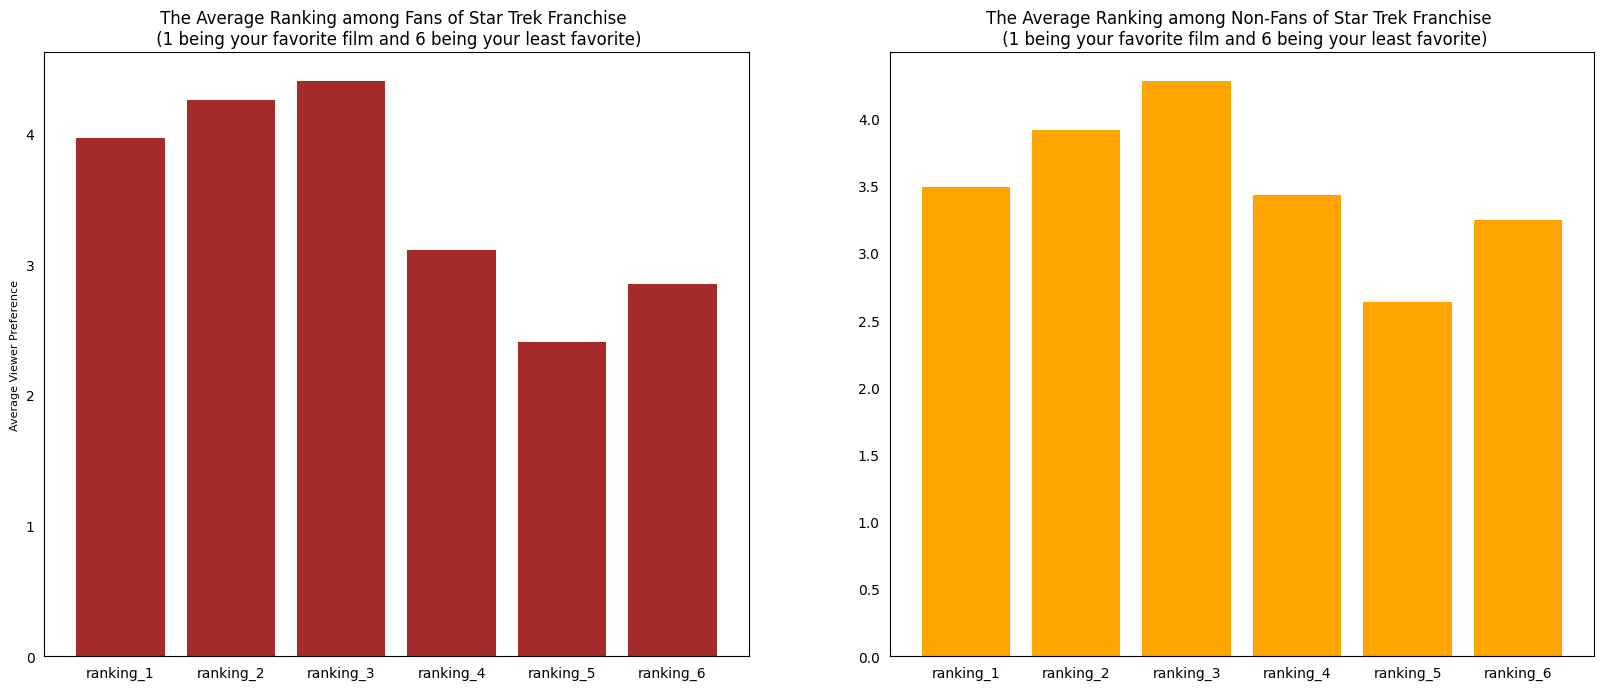

In [8]:
#Split the Dataframe into two groups
fan_trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes" ]
not_fan_trek = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No" ]

# Compute the Mean of the Movie Ranks
average_rank_fan_trek=fan_trek[fan_trek.columns[9:15]].mean()
average_rank_not_fan_trek=not_fan_trek[not_fan_trek.columns[9:15]].mean()

print(f"The Average Rank among Fans of Star Trek Franchise:\n{average_rank_fan_trek.sort_values()}")
print("\n")
print(f"The Average Rank among Non-Fans of Star Trek Franchise:\n{average_rank_not_fan_trek.sort_values()}")

# Plot a bar chart of the movie ranks among fans
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.bar(star_wars.columns[9:15], average_rank_fan_trek, color="brown")
plt.title("The Average Ranking among Fans of Star Trek Franchise \n (1 being your favorite film and 6 being your least favorite)")
plt.ylabel("Average Viewer Preference", fontsize=8)
plt.tick_params(bottom=False, left=False)

# Plot a bar chart of the movie ranks among non fans
plt.subplot(1, 2, 2)
plt.bar(star_wars.columns[9:15], average_rank_not_fan_trek, color="orange")
plt.title("The Average Ranking among Non-Fans of Star Trek Franchise \n (1 being your favorite film and 6 being your least favorite)")
plt.tick_params(bottom=False, left=False)
plt.show()


There is no much diffence in preference among Fans and Non-Fans of Star Trek Franchise

## Exploring Ratings among Gender groups
Do male and female viewers agree on the order of movie preference from first to sixth?

In [9]:
#Split the Dataframe into two groups
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

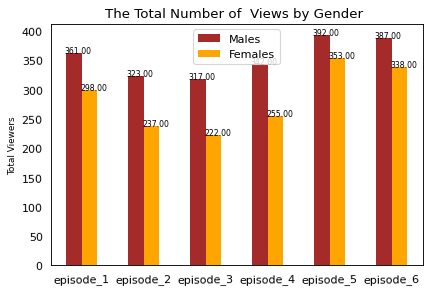

In [10]:
# Compute the Mean of the Movie Ranks
seen_males=males[males.columns[3:9]].sum()
seen_females=females[females.columns[3:9]].sum()

df = pd.DataFrame({"Males": seen_males,"Females": seen_females})

# Plot a bar chart of the movie ranks by Gender
plt.rcParams['figure.dpi'] = 80
fig = df.plot.bar(color=["brown","orange"])
plt.title("The Total Number of  Views by Gender ", fontsize=12)
plt.ylabel("Total Viewers", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=True)

# establish position of bar values at top of bars
x_offset = -0.15
y_offset = 0.05
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=7)
plt.show()

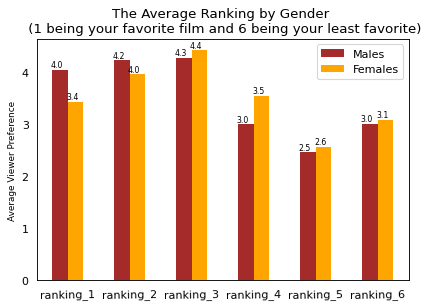

In [11]:
# Compute the Mean of the Movie Ranks
average_rank_males=males[males.columns[9:15]].mean()
average_rank_females=females[females.columns[9:15]].mean()

df = pd.DataFrame({"Males": average_rank_males,"Females": average_rank_females})

# Plot a bar chart of the movie ranks by Gender
plt.rcParams['figure.dpi'] = 80
fig = df.plot.bar(color=["brown","orange"])
plt.title("The Average Ranking by Gender \n (1 being your favorite film and 6 being your least favorite)", fontsize=12)
plt.ylabel("Average Viewer Preference", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=True)

# establish position of bar values at top of bars
x_offset = -0.15
y_offset = 0.05
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.1f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=7)
plt.show()

There are more male viewers than female for all six movies because there were more males than females choosing to be involved in the survey. The pattern of movie preferences from episode  1 to 6 is almost the same for male and female viewers.

## Exploring Movie Preference by Age
There are four age groups identified in the survey. Is there any difference in movie preference among age groups?

In [12]:
# Determine age groups.
age = star_wars["Age"].value_counts(dropna=False)
print(age)

45-60    240
30-44    207
> 60     193
18-29    180
NaN      116
Name: Age, dtype: int64


In [13]:
# define DataFrame names for each age group and missing values.
age_na = star_wars[star_wars["Age"].isna()]
eighteen_twentynine = star_wars[star_wars["Age"] == "18-29"]
thirty_fortyfour = star_wars[star_wars["Age"] == "30-44"]
fortyfive_sixty = star_wars[star_wars["Age"] == "45-60"]
sixty_plus = star_wars[star_wars["Age"] == "> 60"]

# Compute the Total  Views among each age group and missing values.
seen_18_29=eighteen_twentynine[eighteen_twentynine.columns[3:9]].sum()
seen_30_44=thirty_fortyfour[thirty_fortyfour.columns[3:9]].sum()
seen_45_60=fortyfive_sixty[fortyfive_sixty.columns[3:9]].sum()
seen_60_more=sixty_plus[sixty_plus.columns[3:9]].sum()


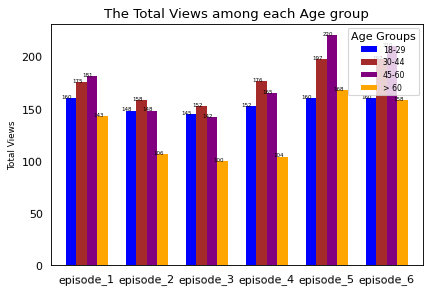

In [14]:
# A bar graph for each group within each movie episode.
df = pd.DataFrame({
    "18-29": seen_18_29,
    "30-44":seen_30_44,
    "45-60":seen_45_60,
    "> 60": seen_60_more
    })

# Plot a bar chart of the Total  Views by Age Group
plt.rcParams['figure.dpi'] = 80
fig = df.plot.bar(color=["blue","brown","purple","orange"], width=0.7)
plt.title("The Total Views among each Age group", fontsize=12)
plt.ylabel("Total Views", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=True)
plt.legend(title="Age Groups", fontsize=7)

# establish position of bar values at top of bars
x_offset = -0.15
y_offset = 0.05
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=5)
plt.show()

In [15]:
# Compute the Mean of the Movie Ranks among each age group and missing values.
average_rank_18_29=eighteen_twentynine[eighteen_twentynine.columns[9:15]].mean()
average_rank_30_44=thirty_fortyfour[thirty_fortyfour.columns[9:15]].mean()
average_rank_45_60=fortyfive_sixty[fortyfive_sixty.columns[9:15]].mean()
average_rank_60_more=sixty_plus[sixty_plus.columns[9:15]].mean()

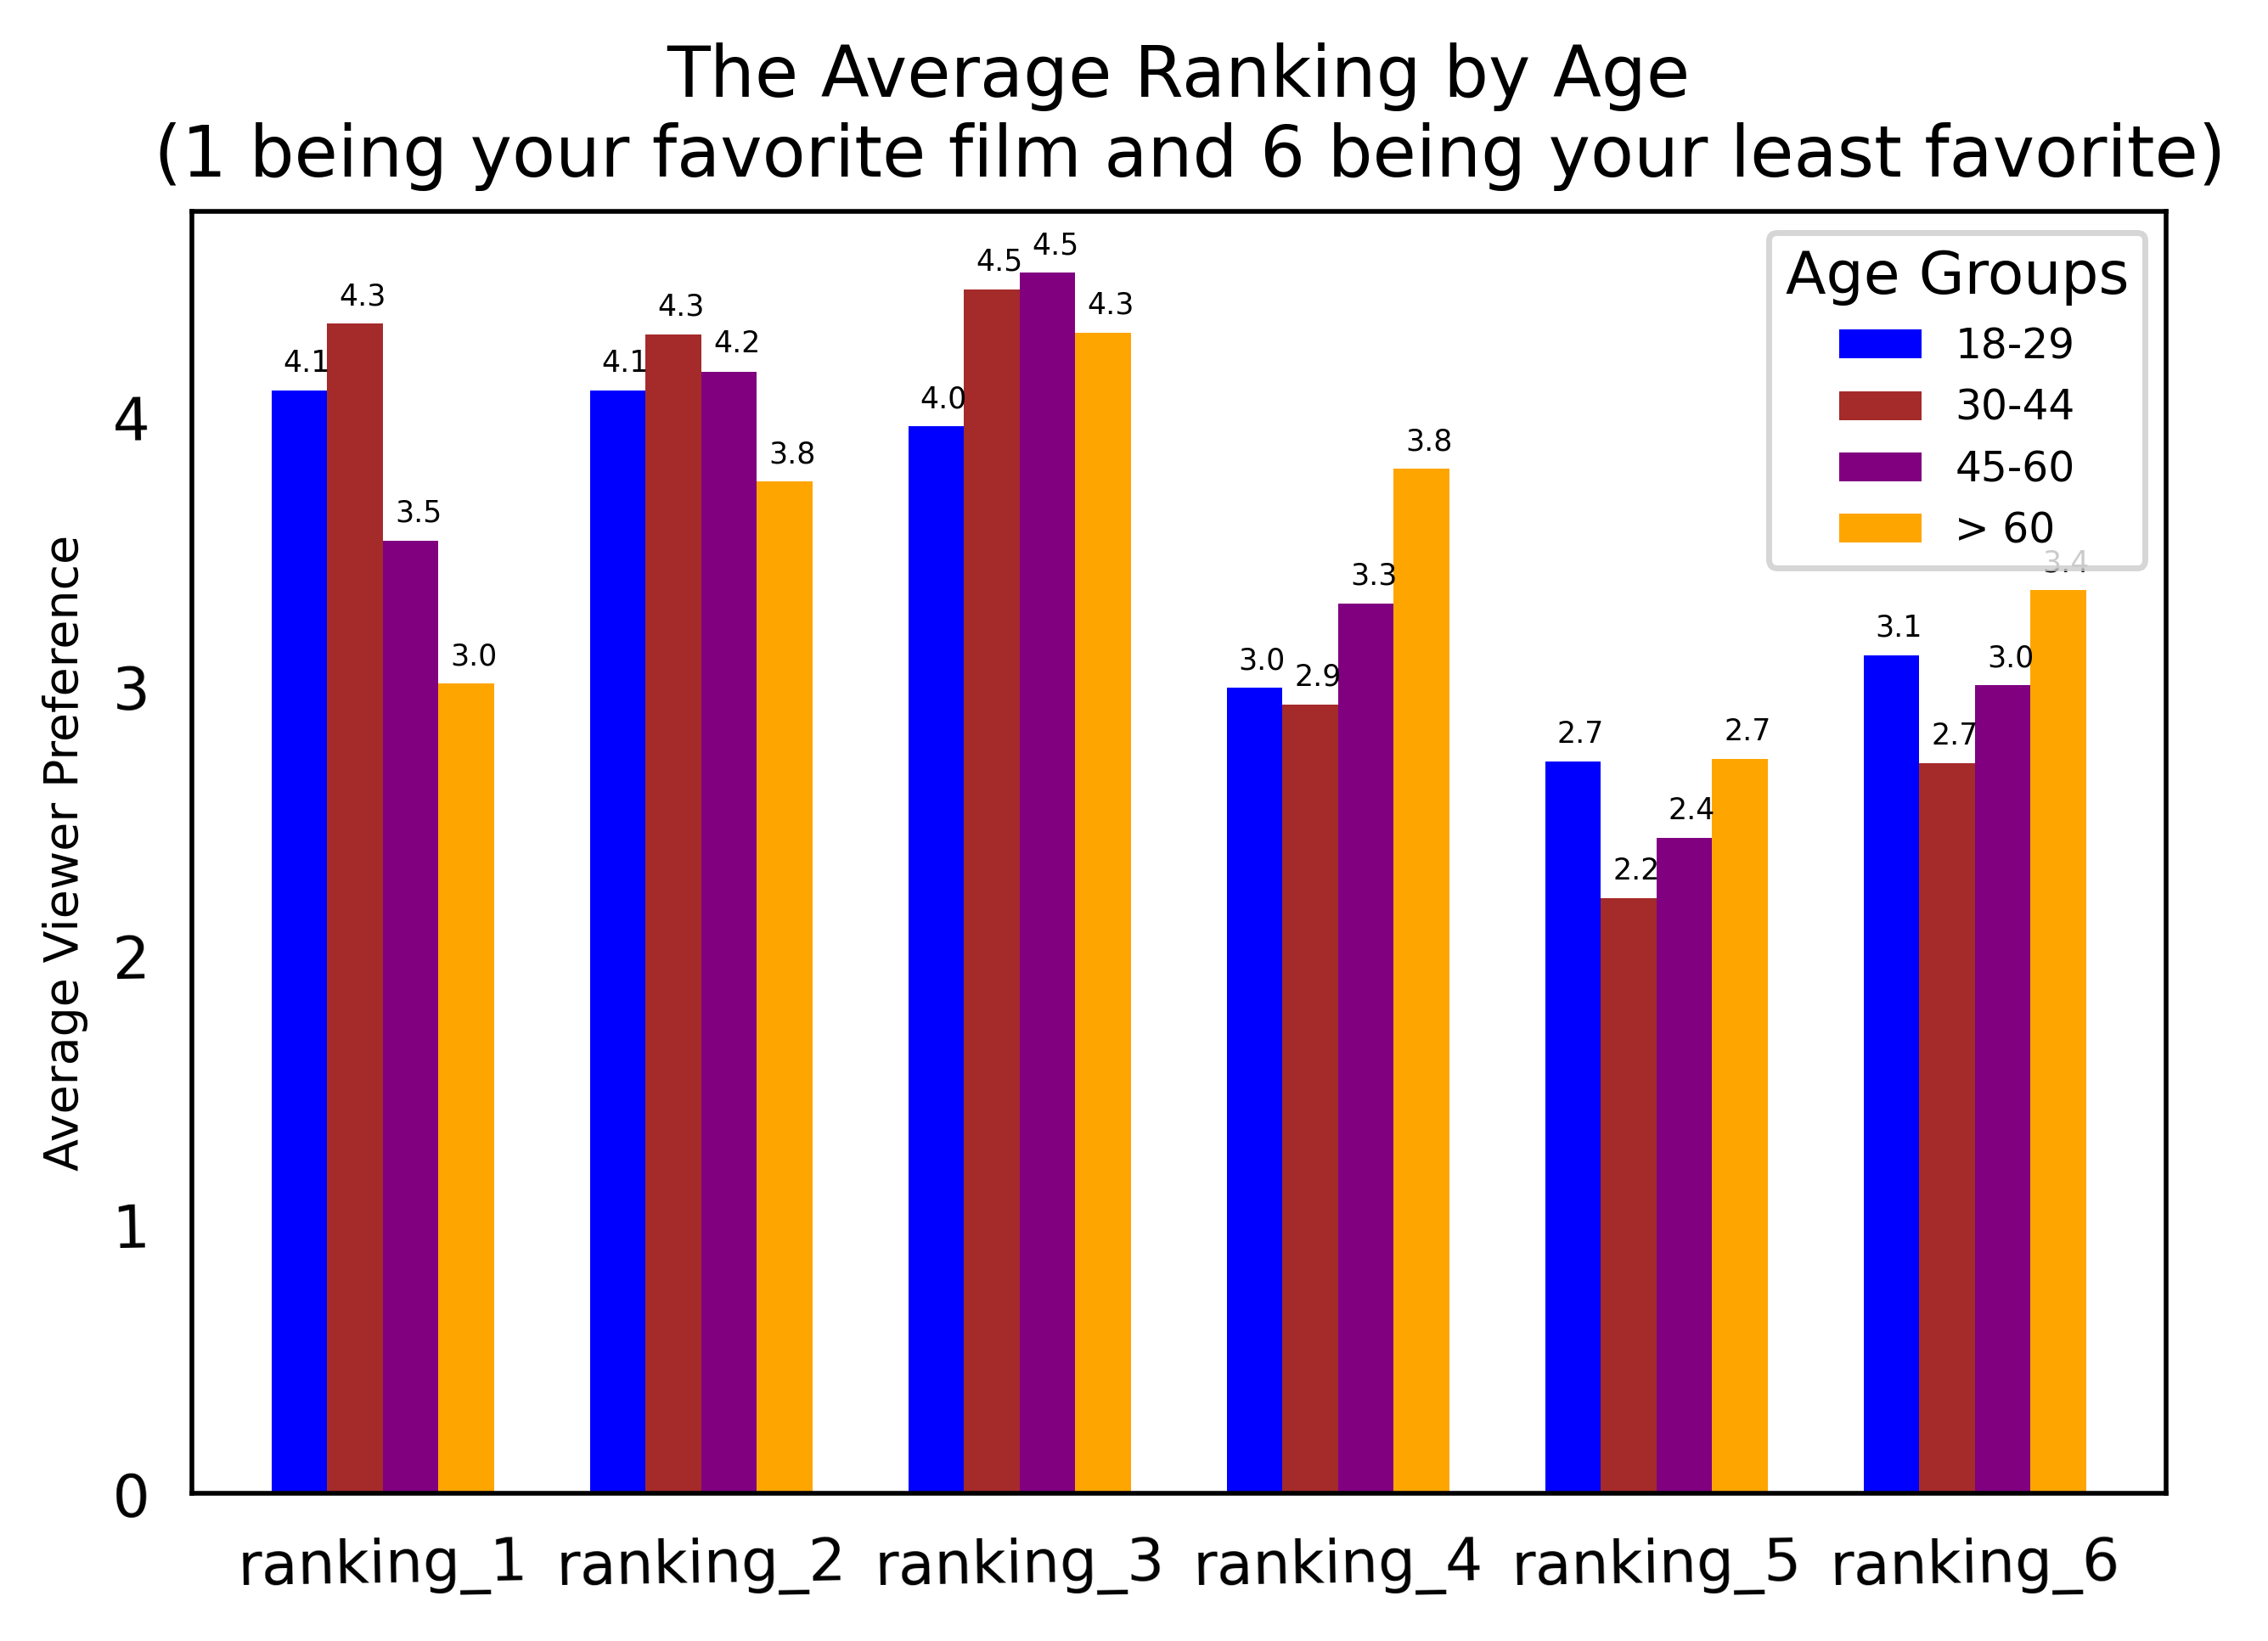

In [16]:
# A bar graph for each group within each movie episode.
df = pd.DataFrame({
    "18-29": average_rank_18_29,
    "30-44":average_rank_30_44,
    "45-60":average_rank_45_60,
    "> 60": average_rank_60_more
    })

# Plot a bar chart of the movie ranks by Age Group
plt.rcParams['figure.dpi'] = 500
fig = df.plot.bar(color=["blue","brown","purple","orange"], width=0.7)
plt.title("The Average Ranking by Age\n (1 being your favorite film and 6 being your least favorite)", fontsize=12)
plt.ylabel("Average Viewer Preference", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=True)
plt.legend(title="Age Groups", fontsize=7)

# establish position of bar values at top of bars
x_offset = -0.05
y_offset = 0.07
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.1f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=5)
plt.show()

There is very little difference in quantity of viewers for all six movies for age group 18-29. It may be the viewers in this age range had not seen the first three movies when intially released between 1977 to 1983 and decided they must watch the movies released between 1999 to 2003 first regardless of how bad they were ranked because of the plot.

All age groups overall first choice movie is `Episode V - The Empire Strikes Back"`. However, there are some other interesting differences between age groups.

Viewers over 60 preferred `Star Wars: Episode I The Phantom Menace` as second choice while it was fourth choice across all ages. Also, viewers over 60 showed a large difference in preference between the `Episode I,  IV, XI movies`, while viewers in the age ranges 18-29 and 30-44 showed very little difference.

## Exploring Movie Preference by Education Level

In [17]:
# Determine Education groups.
education = star_wars["Education"].value_counts(dropna=False)

In [18]:
# define DataFrame names for each education group and missing values.
education_na = star_wars[star_wars["Education"].isna()]
bachelor_degree = star_wars[star_wars["Education"]=="Bachelor degree"]
associate_degree = star_wars[star_wars["Education"] == "Some college or Associate degree"]
graduate_degree = star_wars[star_wars["Education"] == "Graduate degree"]
high_school_degree = star_wars[star_wars["Education"] == "High school degree"]
no_high_school_degree = star_wars[star_wars["Education"] == "Less than high school degree"]

# Compute the Total  Views among each education group and missing values.
seen_education_na=education_na[education_na.columns[3:9]].sum()
seen_bachelor_degree=bachelor_degree[bachelor_degree.columns[3:9]].sum()
seen_associate_degree=associate_degree[associate_degree.columns[3:9]].sum()
seen_graduate_degree=graduate_degree[graduate_degree.columns[3:9]].sum()
seen_high_school_degree=high_school_degree[high_school_degree.columns[3:9]].sum()
seen_no_high_school_degree=no_high_school_degree[no_high_school_degree.columns[3:9]].sum()


Bachelor degree                     262
Some college or Associate degree    254
Graduate degree                     226
NaN                                 120
High school degree                   71
Less than high school degree          3
Name: Education, dtype: int64


           Bachelor degree  Associate degree  Graduate degree  \
episode_1              206               211              179   
episode_2              170               186              149   
episode_3              163               183              139   
episode_4              195               180              163   
episode_5              243               227              207   
episode_6              234               223              201   

           High school degree  No high school degree   Education NaN  
episode_1                  57                       3             17  
episode_2                  48                       3             15  
episode_3                  48                       3      

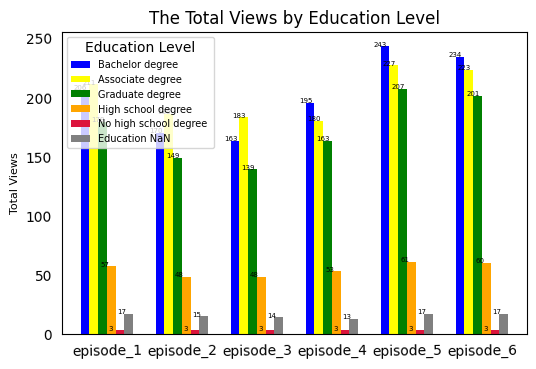

In [19]:
# A bar graph for each group within each movie episode.
df = pd.DataFrame({
    "Bachelor degree": seen_bachelor_degree,
    "Associate degree": seen_associate_degree,
    "Graduate degree": seen_graduate_degree,
    "High school degree": seen_high_school_degree,
    "No high school degree ": seen_no_high_school_degree,
    "Education NaN": seen_education_na
     })
print(education)
print("\n")
print(df)
# Plot a bar chart of the Total  Views by Education Level
plt.rcParams['figure.dpi'] = 100
fig = df.plot.bar(color=["blue","yellow","green","orange", "crimson", "grey"], width=0.7)
plt.title("The Total Views by Education Level", fontsize=12)
plt.ylabel("Total Views", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=True)
plt.legend(title="Education Level", fontsize=7)

# establish position of bar values at top of bars
x_offset = -0.15
y_offset = 0.05
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=5)
plt.show()

In [20]:
# Compute the Average Ranking among each education group and missing values.
average_rank_education_na=education_na[education_na.columns[9:15]].mean()
average_rank_bachelor_degree=bachelor_degree[bachelor_degree.columns[9:15]].mean()
average_rank_associate_degree=associate_degree[associate_degree.columns[9:15]].mean()
average_rank_graduate_degree=graduate_degree[graduate_degree.columns[9:15]].mean()
average_rank_high_school_degree=high_school_degree[high_school_degree.columns[9:15]].mean()
average_rank_no_high_school_degree=no_high_school_degree[no_high_school_degree.columns[9:15]].mean()

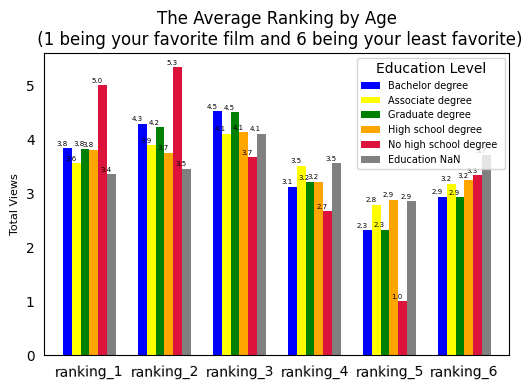

In [21]:
# A bar graph for each group within each movie episode.
df = pd.DataFrame({
    "Bachelor degree": average_rank_bachelor_degree,
    "Associate degree": average_rank_associate_degree,
    "Graduate degree": average_rank_graduate_degree,
    "High school degree": average_rank_high_school_degree,
    "No high school degree ": average_rank_no_high_school_degree,
    "Education NaN":  average_rank_education_na
     })

# Plot a bar chart of the Average Ranking by Education Level
plt.rcParams['figure.dpi'] = 100
fig = df.plot.bar(color=["blue","yellow","green","orange", "crimson", "grey"], width=0.7)
plt.title("The Average Ranking by Age\n (1 being your favorite film and 6 being your least favorite)", fontsize=12)
plt.ylabel("Total Views", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=True)
plt.legend(title="Education Level", fontsize=7)

# establish position of bar values at top of bars
x_offset = -0.15
y_offset = 0.05
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.1f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=5)
plt.show()

Most of the people who responded to the survey have higher education beyond high school. Atleast 120 of these respondents did not state their education level, `NaN`. It is interesting to note that for each education level, other than `Less than high school degree`, not all respondents watched a certain movie.

There is also a slight difference in number of viewers and movie preference for all six movies with all education groups overall most watched and first choice movie being `Episode V - The Empire Strikes Back`.


## Analyzing Star Wars Character Preferences

There are fourteen characters identified in the survey who were portrayed in some or all of the movies. Who were the most liked, the most disliked and the most controversial?

In [22]:
# Clean columns 15 through 28, which contain data on the characters respondents view favorably and unfavorably.
star_wars = star_wars.rename(columns={
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":
    "Han Solo"})
star_wars = star_wars.rename(columns={"Unnamed: 16": "Luke Skywalker"})
star_wars = star_wars.rename(columns={"Unnamed: 17": "Princess Leia Organa"})
star_wars = star_wars.rename(columns={"Unnamed: 18": "Anakin Skywalker"})
star_wars = star_wars.rename(columns={"Unnamed: 19": "Obi Wan Kenobi"})
star_wars = star_wars.rename(columns={"Unnamed: 20": "Emperor Palpatine"})
star_wars = star_wars.rename(columns={"Unnamed: 21": "Darth Vader"})
star_wars = star_wars.rename(columns={"Unnamed: 22": "Lando Calrissian"})
star_wars = star_wars.rename(columns={"Unnamed: 23": "Boba Fett"})
star_wars = star_wars.rename(columns={"Unnamed: 24": "C 3P0"})
star_wars = star_wars.rename(columns={"Unnamed: 25": "R2 D2"})
star_wars = star_wars.rename(columns={"Unnamed: 26": "Jar Jar Binks"})
star_wars = star_wars.rename(columns={"Unnamed: 27": "Padme Amidala"})
star_wars = star_wars.rename(columns={"Unnamed: 28": "Yoda"})

# Determine Character Rating.
han = star_wars["Han Solo"].value_counts(dropna=False)
print(han)

Very favorably                                 610
Somewhat favorably                             151
NaN                                            107
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64


In [23]:
# convert the rank descriptions to numeric values from 1 to 5 by using mapping.

mapping = {"Very favorably": "5", "Somewhat favorably": "4", "Neither favorably nor unfavorably (neutral)": "3",
           "Somewhat unfavorably": "2", "Very unfavorably": "1", "Unfamiliar (N/A)": "0"}

star_wars["Han Solo"] = star_wars["Han Solo"].replace(mapping)
star_wars["Luke Skywalker"] = star_wars["Luke Skywalker"].replace(mapping)
star_wars["Princess Leia Organa"] = star_wars["Princess Leia Organa"].replace(mapping)
star_wars["Anakin Skywalker"] = star_wars["Anakin Skywalker"].replace(mapping)
star_wars["Obi Wan Kenobi"] = star_wars["Obi Wan Kenobi"].replace(mapping)
star_wars["Emperor Palpatine"] = star_wars["Emperor Palpatine"].replace(mapping)
star_wars["Darth Vader"] = star_wars["Darth Vader"].replace(mapping)
star_wars["Lando Calrissian"] = star_wars["Lando Calrissian"].replace(mapping)
star_wars["Boba Fett"] = star_wars["Boba Fett"].replace(mapping)
star_wars["C 3P0"] = star_wars["C 3P0"].replace(mapping)
star_wars["R2 D2"] = star_wars["R2 D2"].replace(mapping)
star_wars["Jar Jar Binks"] = star_wars["Jar Jar Binks"].replace(mapping)
star_wars["Padme Amidala"] = star_wars["Padme Amidala"].replace(mapping)
star_wars["Yoda"] = star_wars["Yoda"].replace(mapping)

characters = star_wars[star_wars.columns[15:29]].apply(pd.to_numeric)
print(characters.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 1185
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Han Solo              829 non-null    float64
 1   Luke Skywalker        831 non-null    float64
 2   Princess Leia Organa  831 non-null    float64
 3   Anakin Skywalker      823 non-null    float64
 4   Obi Wan Kenobi        825 non-null    float64
 5   Emperor Palpatine     814 non-null    float64
 6   Darth Vader           826 non-null    float64
 7   Lando Calrissian      820 non-null    float64
 8   Boba Fett             812 non-null    float64
 9   C 3P0                 827 non-null    float64
 10  R2 D2                 830 non-null    float64
 11  Jar Jar Binks         821 non-null    float64
 12  Padme Amidala         814 non-null    float64
 13  Yoda                  826 non-null    float64
dtypes: float64(14)
memory usage: 109.7 KB
None


In [24]:
cols = ["Han Solo", "Luke Skywalker", "Princess Leia Organa",
       "Anakin Skywalker", "Obi Wan Kenobi", "Emperor Palpatine",
       "Darth Vader", "Lando Calrissian", "Boba Fett", "C 3P0", "R2 D2",
       "Jar Jar Binks", "Padme Amidala", "Yoda"]

#Calculate the mean of the characters with non 0 values.

characters_means = characters[characters[cols]!=0].mean()
characters_means = characters_means.sort_values(ascending=False)


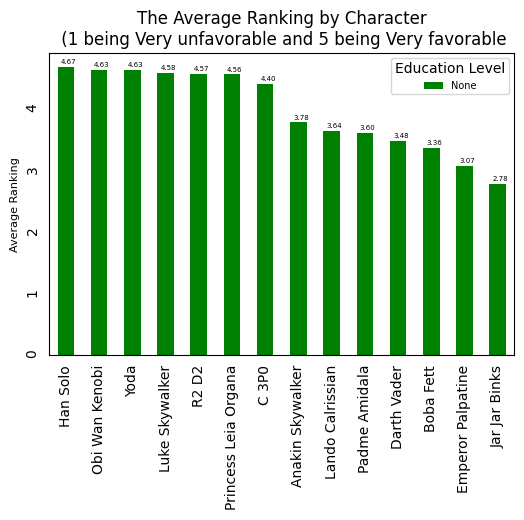

In [25]:
# Plot a bar chart of the Averages
plt.rcParams['figure.dpi'] = 100
fig = characters_means.plot.bar(color="green")
plt.title("The Average Ranking by Character\n (1 being Very unfavorable and 5 being Very favorable", fontsize=12)
plt.ylabel("Average Ranking", fontsize=8)
plt.tick_params(bottom=False, left=False, labelrotation=90)
plt.legend(title="Education Level", fontsize=7)

# establish position of bar values at top of bars
x_offset = -0.15
y_offset = 0.05
for p in fig.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    fig.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=5)
plt.show()

The top 5 movie characters most liked by viewers are: Han Solo, Obi Wan Kenobi, Yoda, Luke Skywalker and R2 D2.

The 5 movie characters most disliked by viewers are: Padme Amidala, Darth Vader, Boba Fett, Emperor Palpatine and Jar Jar Binks.

The characters that are most controversial are: Princess Leia Organa, C 3P0, Anakin Skywalker and Lando Calrissian

## Project Summary

The survey results confirmed the claim of the team at  [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/): `Star Wars Episode V The Empire Strikes Back` is the best among the first six Star Wars movies released.

Overall, fans broke into two camps: those who preferred the original three movies and those who preferred the three prequels. People who said `The Empire Strikes Back` was their favorite were also likely to rate  `A New Hope` and `Return of the Jedi` higher as well. Those who rated `The Phantom Menace` as the best film were more likely to rate prequels higher.

Generally there are many different reasons why we like or dislike films and it's always good to have that freedom and the choice to decide since entertainment has a broad audience.